## Sentiment Analysis Model

### Importing the data

Each review is meticulously labeled with a 0 for negative sentiment and 1 for positive setiment analysis works

This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.

In [1]:
import pandas as pd
df = pd.read_csv('Data/reviews.csv', encoding='ISO-8859-1')
df.head()

,Text,Sentiment
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       50000 non-null  object
 1   Sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [3]:
# to see how many instances there are of each class (0 for negative and 1 for positive)
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          25000  24697  When i got this movie free from my job, along ...   
1          25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
Sentiment       
0            3  
1            5

In [4]:
# to delete the duplicate rows and cols
df = df.drop_duplicates()

In [5]:
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Once again Mr. Costner has dragged out a movie...   
1          24884  24884  I went and saw this movie last night after bei...   

                
          freq  
Sentiment       
0            1  
1            1

### Preparing and `Vectorizing` the text`

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']

### Splitting the data into training and test sets

In [7]:
# using 50/50 split since there are almost 50k samples in total

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

### Training the classifier (Logistic Regression)

In [8]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

### Validating the model with the confusion matrix

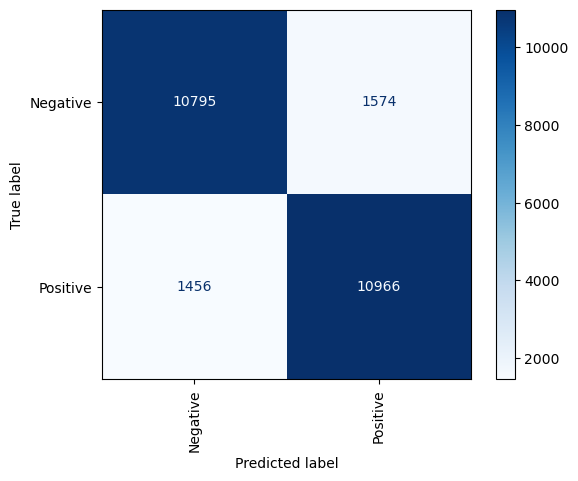

In [9]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
cmd.from_estimator(model, x_test, y_test, display_labels=['Negative', 'Positive'],
                  cmap='Blues', xticks_rotation='vertical')

### Producing a sentiment score for a sentence

In [11]:
text = 'The long lines and poor customer service really turned me off'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.0918337559870496

In [12]:
# Let's try again with different text
text = 'The food was great and the service was excellent'
model.predict_proba(vectorizer.transform([text]))[0][1]

0.8536013713916465